**Universidade Federal do Rio de Janeiro**
Trabalho 2 de Aprendizado de Máquina
Igor Nunes Patricio
DRE:116145754

**Resumo do que foi feito**

O trabalho foi dividido em 4 partes: a primeira foi essencialmente o pré - processamento de dados, para tentar melhorar as imagens de forma que quando passassem nos modelos de aprendizado de máquina aumentassem seu poder de predição. A segunda parte do trabalho consistiu em escolher um classificador que resultasse em boas medições para as métricas sensibilidade e f1 score para controlar falosos negativos, já que foi dito que a Espécie 8472 teme muito os vulcões. A terceira parte do trabalho consistiu em escolher um classificador que resultasse em boas medições para as métricas sensibilidade ponderada e f1 score ponderado (a ponderação se dá através da proporção das classes) pelo mesmo motivo dos falsos negativos do objetivo 2. Por fim, na quarta e última parte do trabalho uma pequena ideia do Objetivo 3 foi dada visando amenizar o desbalanceamento entre classes e possíveis caminhos para melhorar o classificador do objetivo 2 (terceira parte do trabalho) foram dados.

**Primeira parte:**

- Para efetivamente começar o pré - processamento é uma prática comum transformar as imagens para o intervalo [0,1], o que foi feito dividindo o dataframe das imagens pelo valor 255. Após isso, já começando o pré - processamento, escolhi a técnica de Total Variation Denoising para reduzir o ruído da imagem (tv_chambolle), uma técnica de reconstrução morfológica por dilatação para encontrar picos (finding peaks do scikit image) e, por último, uma ténica para remover pequenos objetos na escala de cinza (top hat filter).

**Segunda parte:**

- Para essa parte os dados, já pré - processados, foram divididos em validação (80%) e treino (20%) de forma estratificada e foram testados 4 classificadores Random Forest com max_depth = 5, 10, 15 e 20 e 7 classificadores K Vizinhos Mais Próximos com k = 1, 2, 3, 5, 10, 15, 20 e foi feita validação cruzada com 5 grupos para obter o melhor classificador segundo as métricas expostas. Dentre os classificadores Random Forest, o que obteve maior poder preditivo no conjunto de validação de foi o classificador com max_depth = 15, obtendo em média 0.745 de sensibilidade e 0.818 de f1 score, equanto o melhor K Vizinhos mais próximos (com k = 1) obteve média 0.550 de sensibilidade e 0.675 de f1 score no conjunto de validação. Ao passar para o conjunto de teste para escolher o melhor entre esses dois classificadores, foi observado que o Random Forest(max_depth = 15) performou melhor, obtendo sensibilidade = 0.777 e f1 score = 0.827) do que o K Vizinhos Mais Próximos (k = 1) que obteve sensibilidade = 0.59 e f1 score = 0.69. Portanto, o classificador Random Forest com max_depth = 15 foi escolhido como o melhor classificador para esse objetivo.

- Obs: Para escolher entre os classificadores Ranfom Forest(max_depth = 15) e K Vizinhos Mais Próximos (k=1) treinei-os em todo conjunto de classificação e testei no conjunto de teste, por isso que as métricas ficaram melhores para esses classificadores no conjunto de teste do que no de validação. Porque como foram treinados em todo o conjunto de validação (80%), tiveram mais dados para aprender. Enquanto que a validação cruzada foi utilizada somente dentro do conjunto de validação, então na escolha do melhor Random Forest e do melhor K vizinhos Mais Próximos os classificadores foram treinados em (4/5) x 80% do total de dados e, por isso, tiveram métricas menores do que no conjunto de teste.

- Além disso, para concluir a segunda parte do trabalho, como foi dito que era necessário evitar falsos negativos, ao invés de classificar uma imagem como vulcão apenas se ela apresentasse probabilidade maior do que 50% de ser vulcão, aceitei evidências menores para classificá-las como tal se a imagem apresentasse probabilidade maior do que 30% de ser vulcão. Assim, diminui-se a quantidade de falsos negativos do classificador como se queria apenas aumentando um pouco a quantidade de falsos positivos. Usando esse novo limiar de probabilidade de classificação, a sensibilidade aumentou para 0.865 e o f1 score ficou em 0.824, bem próximo do que ja era antes.

**Terceira parte:**

- Foi feito o mesmo procedimento para a divisão em dados de validação e teste da segunda parte do trabalho e aqui foram testados 4 classificadores Random Forest com max_depth = 5, 10, 15, 20. Neste caso, não houve melhora expressiva do classificador com max_depth = 20 (sensibilidade ponderada = 0.608, f1 score ponderado = 0.563) pro max_depth = 15 (sensibilidade ponderada = 0.608, f1 score ponderado = 0.559), então usei o com max_depth = 20, pois ele obteve um pequeno aumento no f1 score ponderado em relação ao com max_depth = 15. 

- Assim como na segunda parte do trabalho, treinei o classificador escolhido em todo o conjunto de validação e calculei as métricas expostas no conjunto de teste. (Aqui, como eu não testei nenhum outro classificador além do Random Forest, talvez fosse melhor fazer validação cruzada em todo o conjunto dos dados ao invés de separar em dados de validação e teste, já que o teste é utilziado para escolher entre classificadores diferentes. Exemplo: escolher entre melhor Ranfom Forest, melhor K Vizinhos mais Próximos e melhor SVM). Os resultados para as métricas foram: sensibilidade ponderada = 0.61 e f1 score ponderado = 0.573. Foram métricas que considero baixas e quando olhamos a matriz de confusão, percebe-se que as imagens que melhor foram classificadas eram apenas crateras ou possivelmente continham ao menos um vulcões, enquanto que as imagens que certamente e provavelmente contém ao menos um vulcão foram bem mal classificadas. Sendo assim, uma decisão para a Espécie 8472 neste caso seria tomar mais cuidado caso uma próxima imagem fosse classificada como possivelmente tendo um vulcão, pois além desse classificador ter ficado ruim para classificar certamente e provavelmente, a maior parte desses dois tipos de imagens foram classificadas como possivelmente contém ao menos um vulcão. Então existe uma boa chance da imagem classificada como possivelmente contém ao menos um vulcão de ser na verdade um certamente ou provavelmente.

**Quarta parte:**

- Para concluir, o objetivo 3 é bastante desbalanceado (mais desbalanceado que os objetivos 1 e 2) e para para amenizar esse problema poderíamos replicar as imagens rotacionando-as como forma de criar "novas observações" para as classes com menor quantidade de observações. Além disso, poderíamos atribuir pesos maiores em classificações erradas de classes com menor quantidade de observações como forma de penalização. Outra ideia seria juntar algumas classes já que esse problema consiste em prever a quantidade de vulcões e, para a Espécie 8472, um vulcão já é ruim, então talvez dois vulcões já seja demais para que a espécie queira povoar o local. Assim, um agrupamento de classes da forma {1}, {2} e{3 ou mais} vulcões pode amenizar o efeito do desbalanceamento também.

- Por fim, como forma de melhorar a sensibilidade, principalmente do Objetivo 2 (terceira parte do trabalho),poderíamos pensar em novas formas de pré - processamento da iamgem já que foi visto que esta é uma etapa crucial na previsão. Além disso, poderíamos construir algo parecido com o que foi feito no objetivo 1, aceitando que as imagens pertencem aos tipos certamente e provavelmente contém ao menos um vulcão com menos evidências, por exemplo caso essas imagens apresentem 20% de probabilidade de ser uma ou outra. Neste caso, a classificação se dá de forma mais complexa e seria preciso pensar mais sobre o assunto.


**Observação:**

- Estou deixando os códigos que fiz da Primeira parte até a Quarta parte todos juntos para serem rodados de uma só vez no final do arquivo.

- Estou deixando também alguns códigos no fim do arquivo para treinar no conjunto feat e resp (**TREINANDO OS CLASSIFICADORES NO CONJUNTO DE DADOS INTEIRO**), fazer o pré - processamento no conjunto de teste (**PRÉ - PROCESSAMENTO NO CONJUNTO DE TESTE**) e fazer a previsão no conjunto de teste (**FAZENDO A PREVISÃO NO CONJUNTO DE TESTE**).

In [ ]:
# pacotes usuais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pacotes para importação dos dados
from google.colab import drive

# scikit image
from skimage.restoration import denoise_tv_chambolle
from skimage.morphology import reconstruction
from skimage import color, morphology

# scikit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# mudando parâmetros gráficos
sns.set(rc={'figure.figsize':(9,7)})

**Importando a base de dados do drive**

In [ ]:
drive.mount('/content/gdrive')
%cd gdrive/My Drive/DATA
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/DATA
features.csv  responses.csv


**Lendo os dados**

In [ ]:
feat = pd.read_csv('/content/gdrive/MyDrive/DATA/features.csv', header = None) # imagens

In [ ]:
resp = pd.read_csv('/content/gdrive/MyDrive/DATA/responses.csv') # respostas

**Pré-processamento dos dados**

Funções a serem utilizadas no pré - processamento:

In [ ]:
# Criando uma funcao fingind peaks
def funcao(linha):

    img = np.array(linha).reshape((110,110)) 
    
    mask = img

    seed = np.copy(img)

    seed[1:-1, 1:-1] = img.min()

    rec = reconstruction(seed, mask, method='dilation')

    return ((img-rec).ravel())


# Criando uma função top hat filter
def funcao_tophat(linha):

    image = np.array(linha).reshape((110,110))

    selem =  morphology.disk(2)
    
    res = morphology.white_tophat(image, selem)

    return ((image-res).ravel())



Primeiro passo: Transformação da escala de cinza de [0,225] para o intervalo [0,1].


In [ ]:
feat_transformado = (feat/255)

Segundo passo: Redução de ruído a partir da técnica Total Variation Filter (TV)

Aplicando em uma imagem para ver a diferença

Text(0.5, 1.0, 'Imagem vulcão com redução de ruído TV')

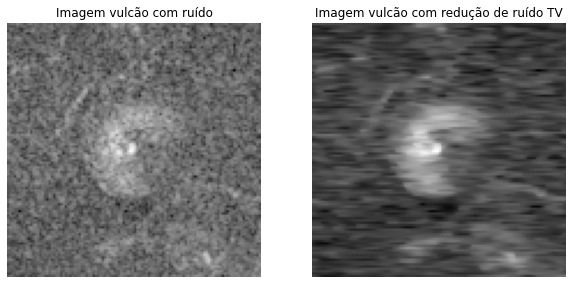

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 9))

# Plotando a imagem

ax[0].imshow(np.array(feat_transformado.iloc[9]).reshape((110,110)),cmap='gray')
ax[0].axis("off")
ax[0].set_title('Imagem vulcão com ruído')

ax[1].imshow(np.array(denoise_tv_chambolle(feat_transformado.iloc[9])).reshape((110,110)),cmap='gray')
ax[1].axis("off")
ax[1].set_title('Imagem vulcão com redução de ruído TV')


Aplicando a técnica de redução de ruído mostrada acima em todo o conjunto de dados.

In [ ]:
feat_transformado_sem_ruido = feat_transformado.apply(func = denoise_tv_chambolle,axis=1)

Terceiro passo: Detecção de objetos (Finding Peaks dos scikit image)

Aplicando em uma imagem para ver a diferença

(-0.5, 109.5, 109.5, -0.5)

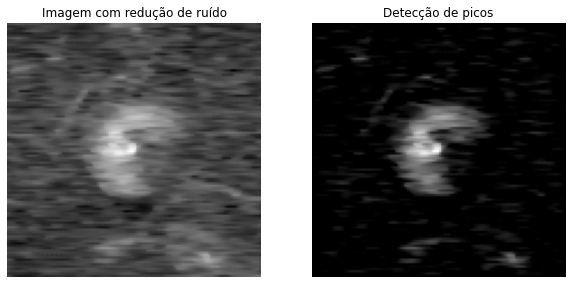

In [ ]:
# transformando imagem

img = np.array(feat_transformado.iloc[9]).reshape((110,110)) # imagem ruidosa com vulcao

img_sr = np.array(denoise_tv_chambolle(feat_transformado.iloc[9])).reshape((110,110)) # imagem sem ruido com vulcao

seed_sr = np.copy(img_sr)

seed_sr[1:-1, 1:-1] = img_sr.min()

mask_sr = img_sr

rec_sr = reconstruction(seed_sr, mask_sr, method='dilation')

# plotando imagem

fig, ax = plt.subplots(1, 2, figsize=(10, 9), sharex=True, sharey=True)

ax[0].imshow(img_sr,cmap='gray')
ax[0].set_title('Imagem com redução de ruído')
ax[0].axis('off')

ax[1].imshow(img_sr-rec_sr, cmap='gray')
ax[1].set_title('Detecção de picos')
ax[1].axis('off')

Aplicando a técnica de detecção de picos mostrada acima aos dados.

In [ ]:
feat_transformado_sem_ruido_finding_peaks = feat_transformado_sem_ruido.apply(func=funcao,axis=1,result_type='broadcast')

Quarto passo: remoção de pequenos objetos na escala de cinza (top hat filter)

Aplicando em uma imagem para ver a diferença

(-0.5, 109.5, 109.5, -0.5)

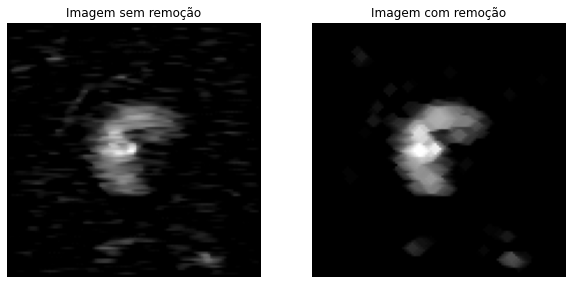

In [ ]:
# Transformando imagem

image = np.array(feat_transformado_sem_ruido_finding_peaks.iloc[9]).reshape((110,110))

selem =  morphology.disk(2)
    
res = morphology.white_tophat(image, selem)

# Plotando imagem

fig, ax = plt.subplots(1, 2, figsize=(10, 9), sharex=True, sharey=True)

ax[0].imshow(image,cmap='gray')
ax[0].set_title('Imagem sem remoção')
ax[0].axis('off')

ax[1].imshow(image-res, cmap='gray')
ax[1].set_title('Imagem com remoção')
ax[1].axis('off')

Aplicando a técnica de remoção de objetos na escala cinza mostrada acima nos dados.

In [ ]:
feat_transformado_sem_ruido_finding_peaks_tophat = feat_transformado_sem_ruido_finding_peaks.apply(func = funcao_tophat,axis=1,result_type='broadcast')

**Objetivo 1: Prever se há ou não vulcão na imagem**

**Dividindo os dados em Validação e teste**

In [ ]:
X = feat_transformado_sem_ruido_finding_peaks_tophat
y = resp['Volcano?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Foi usado o Random Forest com max_depth = 15, pois obteve melhores resultados nos dados de teste.

In [ ]:
# Treinando classificador escolhido

clf_RF_15 = RandomForestClassifier(max_depth=15, random_state=0, criterion = 'entropy')

clf_RF_15.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Como a Espécie 8472 tem pavor de vulcões, podemos classificar uma imagem como contendo vulcão a partir de uma pequena probabilidade dela ter vulcão, o que podemos fazer mudando o limiar de classificação para 0.3 ao invés do padrão o.5. Isso foi feito nos códigos abaixo.

In [ ]:
y_pred_proba = clf_RF_15.predict_proba(X_test)

y_pred = np.zeros(y_test.shape[0])

y_pred[y_pred_proba[:,1]>.3] = 1

A matriz de confusão abaixo com esse novo limiar de 0.3 previu melhor os casos que são vulcões como queríamos.

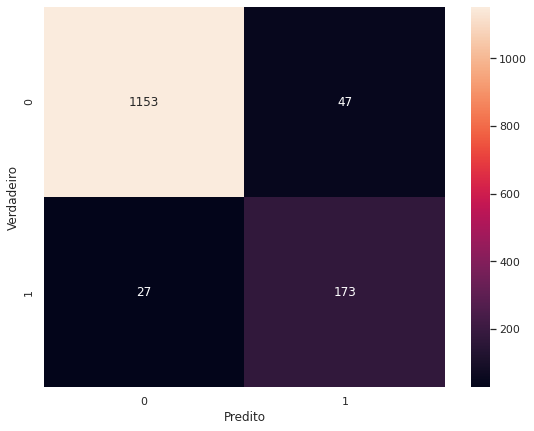

In [ ]:
matriz = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
matriz.set(xlabel="Predito", ylabel = "Verdadeiro")
plt.show()

A sensibilidade e o f1 score ficaram bons, o que nos diz que temos poucos falsos negativos sem que houvesse uma perda alta na classificação de imagens não vulcões também.

In [ ]:
print('A sensibilidade ficou em: ', np.round(recall_score(y_test,y_pred), decimals=4))
print('O F1 score ficou em :', np.round(f1_score(y_test,y_pred), decimals=4))

A sensibilidade ficou em:  0.865
O F1 score ficou em : 0.8238


**Objetivo 2: Prever o "tipo" dos vulcões**

Filtrando os dados que são vulcões

In [ ]:
y = resp[resp['Volcano?']==True]['Type']
X = feat_transformado_sem_ruido_finding_peaks_tophat[resp['Volcano?']==True]

Dividindo os dados em validação (80%) e teste (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

Usando o Random Forest com max_depth = 20

In [ ]:
clf_RF_20 = RandomForestClassifier(max_depth=20, random_state=0, criterion = 'entropy')

clf_RF_20.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Plotando as métricas Sensibilidade e F1 ponderadas pela proporção das classes e a matriz de confusão.

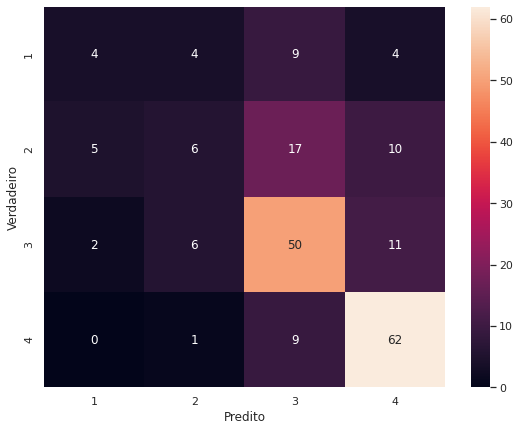

In [ ]:
y_pred = clf_RF_20.predict(X_test)
matriz = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=np.array([1,2,3,4]),yticklabels=np.array([1,2,3,4]))
matriz.set(xlabel="Predito", ylabel = "Verdadeiro")
plt.show()

In [ ]:
print("Sensibilidade ponderada:", np.round(recall_score(y_test, y_pred, average='weighted'),decimals=4))
print('F1 ponderado:',np.round(f1_score(y_test, y_pred, average='weighted'), decimals=4))

Sensibilidade ponderada: 0.61
F1 ponderado: 0.5725


Como pode ser visto na matriz de confusão acima, as imagens que foram melhor classificadas foram as que apresentam apenas uma cratera (tipo 4) e aquelas que possivelmente (tipo 3) contém pelo menos um vulcão. No entanto, as imagens que certamente (tipo 1) e provavelmente (tipo 2) contém pelo menos um vulcão foram mal previstas. Pelo menos percebe-se pela matriz que a maioria das imagens que certamente (tipo 1) e provavelmente (tipo 2) contém ao menos um vulcão foram classificadas como possivelmente (tipo 3) contém um vulcão. Sendo assim, para concluir esse objetivo 2, uma possível decisão a se tomar seria: Se o classificador do objetivo 2 apresentar que na imagem possivelmente há um vulcão (tipo 3) será melhor que a Espécie 8472 nem vá verificar o local, pois como foi dito acima, a maioria das imagens que certamente (tipo 1) e provavelmente (tipo 2) contém ao menos um vulcão foram classificadas como possivelmente (tipo 3) contém um vulcão.

**Objetivo 3: Prever a quantidade de vulcões na imagem**

Para diminuir o efeito do desbalanceamento dos dados podemos pensar em estratégias para aumentar o número de imagens com 5, 4, 3 e 2 vulcões podemos replicando-as rotacionadas por algum valor como 10 graus, 20 graus e etc. Assim, criaremos dados artificias para tentar amenizar o efeito do desbalanceamento. Pode-se tambem criar classes do tipo 3 ou mais vulcões que também amenizariam o desbalanceamento dos dados. Pode-se também dar pesos maiores as imagens que possuem mais vulcões na hora de fazer o fit, já que elas são mais escassas na base de dados. Além disso, é sempre importante usar o stratify no momento da divisão em dados de validação e teste.

**CÓDIGOS DE LEITURA DOS DADOS, PRÉ - PROCESSAMENTO DAS IMAGENS E DOS OBJETIVOS 1 E 2 PARA RODAR TUDO DE UMA VEZ**

Matriz de confusão do Objetivo 1


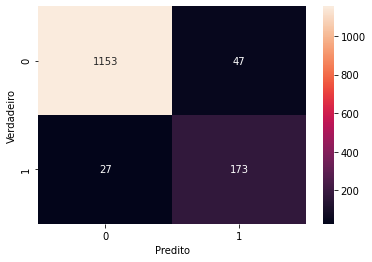

A sensibilidade ficou em:  0.865
O f1 score ficou em : 0.8238
Matriz de confusão do Objetivo 2


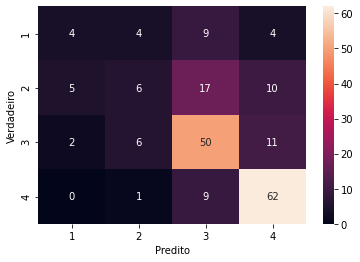

Sensibilidade ponderada: 0.61
f1 score ponderado: 0.5725


In [ ]:
# Leitura dos dados
feat = pd.read_csv('/content/gdrive/MyDrive/DATA/features.csv', header = None) # COLOCAR AQUI O CAMINHO DAS FEATURES

resp = pd.read_csv('/content/gdrive/MyDrive/DATA/responses.csv') # COLOCAR AQUI O CAMINHO DAS RESPOSTAS

# PRÉ - PROCESSAMENTO DOS DADOS
feat_transformado = (feat/255)

feat_transformado_sem_ruido = feat_transformado.apply(func = denoise_tv_chambolle,axis=1)

feat_transformado_sem_ruido_finding_peaks = feat_transformado_sem_ruido.apply(func=funcao,axis=1,result_type='broadcast')

feat_transformado_sem_ruido_finding_peaks_tophat = feat_transformado_sem_ruido_finding_peaks.apply(func = funcao_tophat,axis=1,result_type='broadcast')

# OBJETIVO 1
X = feat_transformado_sem_ruido_finding_peaks_tophat

y = resp['Volcano?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

clf_RF_15 = RandomForestClassifier(max_depth=15, random_state=0, criterion = 'entropy')

clf_RF_15.fit(X_train, y_train)

y_pred_proba = clf_RF_15.predict_proba(X_test)

y_pred = np.zeros(y_test.shape[0])

y_pred[y_pred_proba[:,1]>.3] = 1

print("Matriz de confusão do Objetivo 1")

matriz = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

matriz.set(xlabel="Predito", ylabel = "Verdadeiro")

plt.show()

print('A sensibilidade ficou em: ', np.round(recall_score(y_test,y_pred), decimals=4))

print('O f1 score ficou em :', np.round(f1_score(y_test,y_pred), decimals=4))

# OBJETIVO 2
y = resp[resp['Volcano?']==True]['Type']

X = feat_transformado_sem_ruido_finding_peaks_tophat[resp['Volcano?']==True]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

clf_RF_20 = RandomForestClassifier(max_depth=20, random_state=0, criterion = 'entropy')

clf_RF_20.fit(X_train,y_train)

y_pred = clf_RF_20.predict(X_test)

print("Matriz de confusão do Objetivo 2")

matriz = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=np.array([1,2,3,4]),yticklabels=np.array([1,2,3,4]))

matriz.set(xlabel="Predito", ylabel = "Verdadeiro")

plt.show()

print("Sensibilidade ponderada:", np.round(recall_score(y_test, y_pred, average='weighted'),decimals=4))

print('f1 score ponderado:',np.round(f1_score(y_test, y_pred, average='weighted'), decimals=4))

**TREINANDO OS CLASSIFICADORES NO CONJUNTO DE DADOS INTEIRO**

In [ ]:
# OBJETIVO 1
X = feat_transformado_sem_ruido_finding_peaks_tophat

y = resp['Volcano?']

clf_RF_15 = RandomForestClassifier(max_depth=15, random_state=0, criterion = 'entropy')

clf_RF_15.fit(X, y)

# OBJETIVO 2
X = feat_transformado_sem_ruido_finding_peaks_tophat[resp['Volcano?']==True]

y = resp[resp['Volcano?']==True]['Type']

clf_RF_20 = RandomForestClassifier(max_depth=20, random_state=0, criterion = 'entropy')

clf_RF_20.fit(X, y)

**PRÉ - PROCESSAMENTO NO CONJUNTO DE TESTE**

In [ ]:
feat_teste = "COLOCAR AQUI AS IMAGENS DE TESTE"

feat_teste_transformado = (df_teste/255)

feat_teste_transformado_sem_ruido = df_teste_transformado.apply(func = denoise_tv_chambolle,axis=1)

feat_teste_transformado_sem_ruido_finding_peaks = df_teste_transformado_sem_ruido.apply(func=funcao,axis=1,result_type='broadcast')

feat_teste_transformado_sem_ruido_finding_peaks_tophat = df_teste_transformado_sem_ruido_finding_peaks.apply(func = funcao_tophat,axis=1,result_type='broadcast')

**FAZENDO A PREVISÃO NO CONJUNTO DE TESTE**

In [ ]:
# OBJETIVO 1
X = feat_teste_transformado_sem_ruido_finding_peaks_tophat

y_teste = "COLOCAR AQUI AS RESPOSTAS DAS IMAGENS DE TESTE DO OBJETIVO 1"

y_pred_proba = clf_RF_15.predict_proba(X)

y_pred = np.zeros(y_teste.shape[0])

y_pred[y_pred_proba[:,1]>.3] = 1

print("Matriz de confusão do Objetivo 1")

matriz = sns.heatmap(confusion_matrix(y_teste,y_pred),annot=True,fmt='d')

matriz.set(xlabel="Predito", ylabel = "Verdadeiro")

plt.show()

print('A sensibilidade ficou em: ', np.round(recall_score(y_teste,y_pred), decimals=4))

print('O f1 score ficou em :', np.round(f1_score(y_teste,y_pred), decimals=4))

# OBJETIVO 2
X = "COLOCAR AQUI AS IMAGENS DE TESTE DO OBJETIVO 2"

y_teste = "COLOCAR AQUI AS RESPOSTAS DAS IMAGENS DE TESTE DO OBJETIVO 2"

y_pred = clf_RF_20.predict(X)

print("Matriz de confusão do Objetivo 2")

matriz = sns.heatmap(confusion_matrix(y_teste,y_pred),annot=True,xticklabels=np.array([1,2,3,4]),yticklabels=np.array([1,2,3,4]))

matriz.set(xlabel="Predito", ylabel = "Verdadeiro")

plt.show()

print("Sensibilidade ponderada:", np.round(recall_score(y_teste, y_pred, average='weighted'),decimals=4))

print('f1 score ponderado:',np.round(f1_score(y_teste, y_pred, average='weighted'), decimals=4))